In [1]:
# import subprocess
# import sys

# def install_requirements():
#     try:
#         subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-r', 'requirements.txt'])
#     except subprocess.CalledProcessError as e:
#         print(f'An error occurred: {e}')
#         sys.exit(1)

# install_requirements()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind, f_oneway, kruskal, spearmanr, chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('train.csv')
df.head(5)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,None,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


# Exploratory Data Analysis

<Figure size 720x432 with 0 Axes>

<AxesSubplot: xlabel='outcome', ylabel='count'>

Text(0.5, 1.0, 'Distribuição da Coluna Alvo (Outcome)')

Text(0.5, 0, 'Outcome')

Text(0, 0.5, 'Contagem')

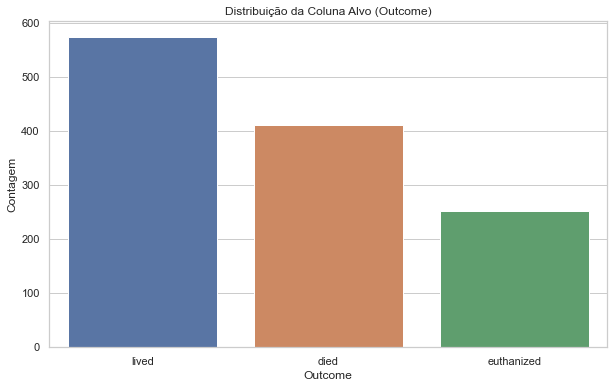

In [3]:
sns.set(style="whitegrid")

# Distribution of 'outcome'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='outcome', order = df['outcome'].value_counts().index)
plt.title('Distribuição da Coluna Alvo (Outcome)')
plt.xlabel('Outcome')
plt.ylabel('Contagem')
plt.show()

The target column (outcome) has three categories: 'lived', 'died' and 'euthanized'. Most records belong to the 'lived' category, followed by 'died' and 'euthanized'.

<AxesSubplot: xlabel='rectal_temp', ylabel='Count'>

Text(0.5, 1.0, 'Distribuição de rectal_temp')

Text(0.5, 0, 'rectal_temp')

Text(0, 0.5, 'Frequência')

<AxesSubplot: xlabel='pulse', ylabel='Count'>

Text(0.5, 1.0, 'Distribuição de pulse')

Text(0.5, 0, 'pulse')

Text(0, 0.5, 'Frequência')

<AxesSubplot: xlabel='respiratory_rate', ylabel='Count'>

Text(0.5, 1.0, 'Distribuição de respiratory_rate')

Text(0.5, 0, 'respiratory_rate')

Text(0, 0.5, 'Frequência')

<AxesSubplot: xlabel='packed_cell_volume', ylabel='Count'>

Text(0.5, 1.0, 'Distribuição de packed_cell_volume')

Text(0.5, 0, 'packed_cell_volume')

Text(0, 0.5, 'Frequência')

<AxesSubplot: xlabel='total_protein', ylabel='Count'>

Text(0.5, 1.0, 'Distribuição de total_protein')

Text(0.5, 0, 'total_protein')

Text(0, 0.5, 'Frequência')

<AxesSubplot: xlabel='abdomo_protein', ylabel='Count'>

Text(0.5, 1.0, 'Distribuição de abdomo_protein')

Text(0.5, 0, 'abdomo_protein')

Text(0, 0.5, 'Frequência')

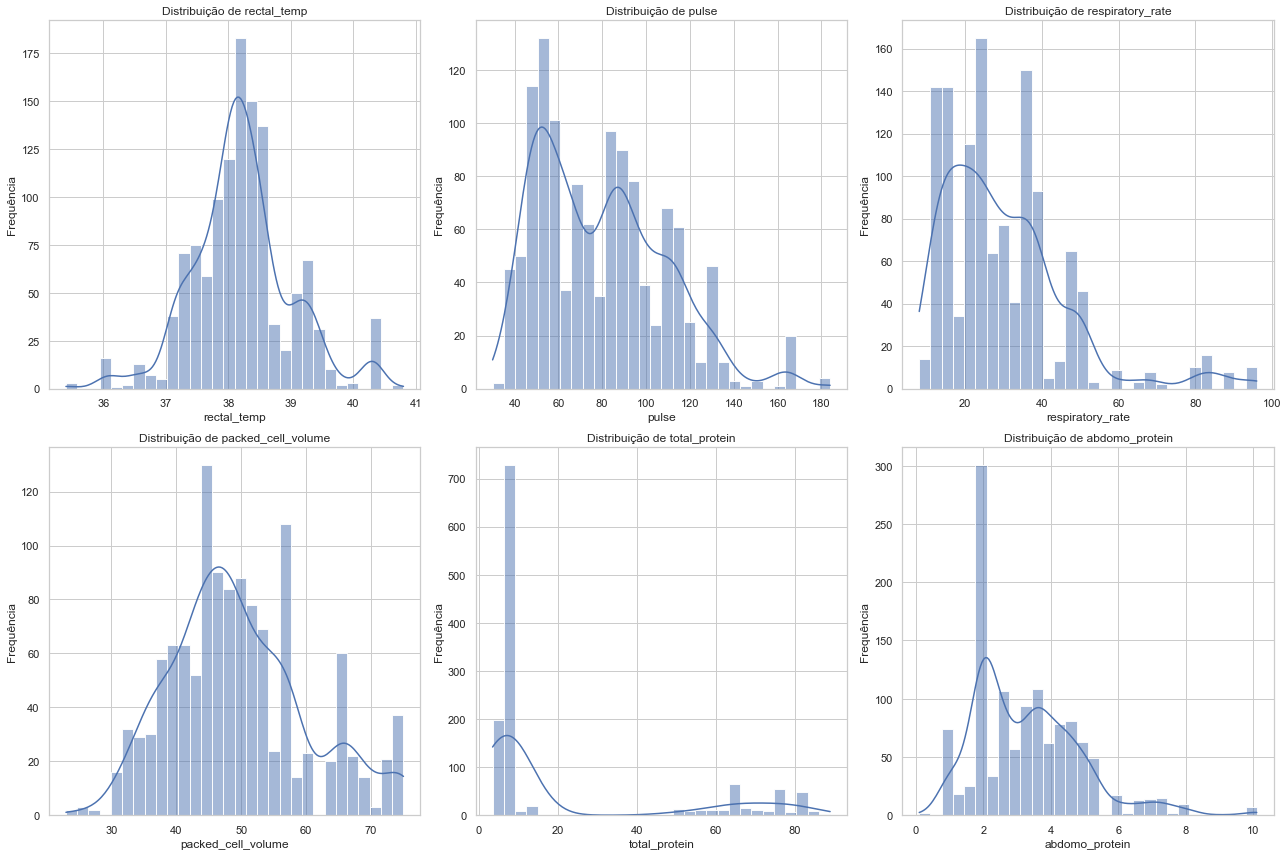

In [4]:
# Selects numerical variables and plots their distributions
numeric_vars = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'abdomo_protein']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, var in enumerate(numeric_vars):
    row = i // 3
    col = i % 3
    sns.histplot(df[var], bins=30, ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Distribuição de {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

+ Rectal Temp: Most values are concentrated around 38 degrees Celsius.
+ Pulse: The distribution is somewhat skewed to the right, with most values between 40 and 100.
+ Respiratory Rate: The distribution is quite skewed to the right, with most values below 40.
+ Packed Cell Volume: Most values are between 35 and 55.
+ Total Protein: There are two peaks in the distribution, one around 7 and the other around 60-70.
+ Abdomen Protein: The distribution is skewed to the right, with most values below 5.

<AxesSubplot: xlabel='surgery', ylabel='count'>

Text(0.5, 1.0, 'Distribuição de surgery')

Text(0.5, 0, 'surgery')

Text(0, 0.5, 'Contagem')

<AxesSubplot: xlabel='age', ylabel='count'>

Text(0.5, 1.0, 'Distribuição de age')

Text(0.5, 0, 'age')

Text(0, 0.5, 'Contagem')

<AxesSubplot: xlabel='temp_of_extremities', ylabel='count'>

Text(0.5, 1.0, 'Distribuição de temp_of_extremities')

Text(0.5, 0, 'temp_of_extremities')

Text(0, 0.5, 'Contagem')

<AxesSubplot: xlabel='peripheral_pulse', ylabel='count'>

Text(0.5, 1.0, 'Distribuição de peripheral_pulse')

Text(0.5, 0, 'peripheral_pulse')

Text(0, 0.5, 'Contagem')

<AxesSubplot: xlabel='mucous_membrane', ylabel='count'>

Text(0.5, 1.0, 'Distribuição de mucous_membrane')

Text(0.5, 0, 'mucous_membrane')

Text(0, 0.5, 'Contagem')

<AxesSubplot: xlabel='pain', ylabel='count'>

Text(0.5, 1.0, 'Distribuição de pain')

Text(0.5, 0, 'pain')

Text(0, 0.5, 'Contagem')

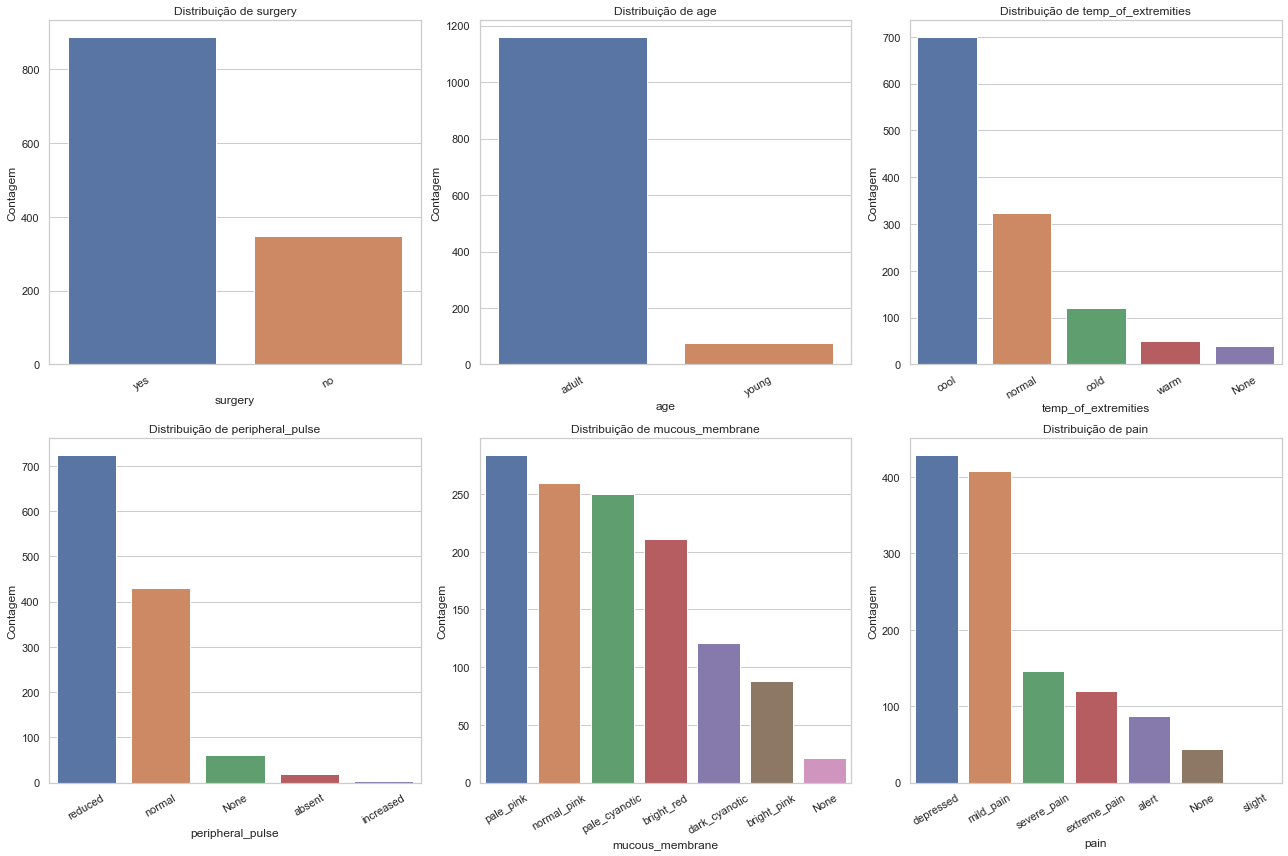

In [5]:
# Selects non-numerical variables and plots their distributions
categorical_vars = ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'pain']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, var in enumerate(categorical_vars):
    row = i // 3
    col = i % 3
    sns.countplot(data=df, x=var, ax=axes[row, col], order=df[var].value_counts().index)
    axes[row, col].set_title(f'Distribuição de {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Contagem')
    axes[row, col].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

+ Surgery: Most cases involved surgery ('yes').
+ Age: The vast majority of registrations are from adults.
+ Temp of Extremities: The 'cool' category is the most common, followed by 'normal'.
+ Peripheral Pulse: Most records have a 'normal' peripheral pulse, followed by a 'reduced' one.
+ Mucous Membrane: 'Pale pink' and 'normal pink' are the most frequent categories.
+ Pain: The 'mild pain' category is the most common, followed by 'depressed'.

<AxesSubplot: xlabel='outcome', ylabel='rectal_temp'>

Text(0.5, 1.0, 'rectal_temp por Outcome')

Text(0.5, 0, 'Outcome')

Text(0, 0.5, 'rectal_temp')

<AxesSubplot: xlabel='outcome', ylabel='pulse'>

Text(0.5, 1.0, 'pulse por Outcome')

Text(0.5, 0, 'Outcome')

Text(0, 0.5, 'pulse')

<AxesSubplot: xlabel='outcome', ylabel='respiratory_rate'>

Text(0.5, 1.0, 'respiratory_rate por Outcome')

Text(0.5, 0, 'Outcome')

Text(0, 0.5, 'respiratory_rate')

<AxesSubplot: xlabel='outcome', ylabel='packed_cell_volume'>

Text(0.5, 1.0, 'packed_cell_volume por Outcome')

Text(0.5, 0, 'Outcome')

Text(0, 0.5, 'packed_cell_volume')

<AxesSubplot: xlabel='outcome', ylabel='total_protein'>

Text(0.5, 1.0, 'total_protein por Outcome')

Text(0.5, 0, 'Outcome')

Text(0, 0.5, 'total_protein')

<AxesSubplot: xlabel='outcome', ylabel='abdomo_protein'>

Text(0.5, 1.0, 'abdomo_protein por Outcome')

Text(0.5, 0, 'Outcome')

Text(0, 0.5, 'abdomo_protein')

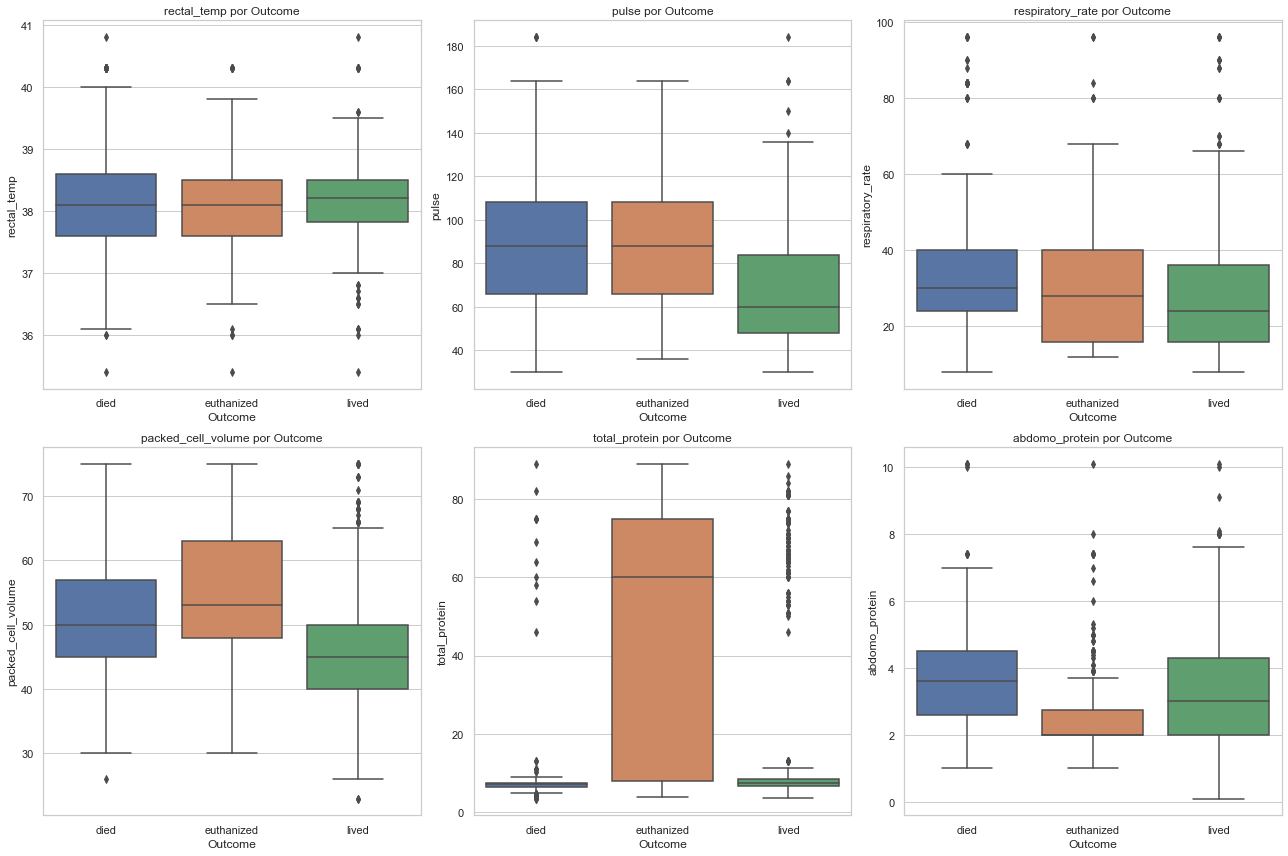

In [6]:
# Plots the relationships between some variables and the target variable
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, var in enumerate(numeric_vars):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df, x='outcome', y=var, ax=axes[row, col])
    axes[row, col].set_title(f'{var} por Outcome')
    axes[row, col].set_xlabel('Outcome')
    axes[row, col].set_ylabel(var)

plt.tight_layout()
plt.show()

+ Rectal Temp: Cases where the result was 'died' tend to have lower rectal temperatures.
+ Pulse: Cases that resulted in 'died' or 'euthanized' tend to have a higher pulse.
+ Respiratory Rate: There is no clear distinction between outcome categories, although 'died' cases appear to have a slightly higher respiratory rate.
+ Packed Cell Volume: The 'died' and 'euthanized' cases appear to have a higher packed cell volume.
+ Total Protein: 'Lived' cases have a tendency towards lower total protein values.
+ Abdominal Protein: Cases that result in 'died' or 'euthanized' tend to have higher levels of abdominal protein.

In [7]:
# Encodes the categorical variables
df_encoded = df.copy()
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_encoder.fit_transform(df[col])

# Plots the correlation of each variable with the target
correlation_matrix = df_encoded.corr()
correlation_with_outcome = correlation_matrix['outcome'].sort_values(ascending=False)
correlation_with_outcome

outcome                  1.000000
temp_of_extremities      0.214535
peristalsis              0.169014
total_protein            0.155941
abdomen                  0.151461
abdominal_distention     0.141344
rectal_exam_feces        0.128992
nasogastric_tube         0.088801
id                       0.046187
cp_data                  0.041040
mucous_membrane          0.033740
lesion_2                 0.032873
lesion_3                 0.016755
rectal_temp              0.005517
lesion_1                 0.002687
nasogastric_reflux      -0.020426
pain                    -0.041320
nasogastric_reflux_ph   -0.084575
abdomo_protein          -0.087725
hospital_number         -0.104766
surgery                 -0.152502
peripheral_pulse        -0.169352
age                     -0.176527
respiratory_rate        -0.185242
packed_cell_volume      -0.235642
surgical_lesion         -0.262132
capillary_refill_time   -0.271274
abdomo_appearance       -0.301062
pulse                   -0.330282
Name: outcome,

Temp of Extremities, Peristalsis, and Total Protein have moderate positive correlations with outcome. This suggests that an increase in these values may be associated with a specific outcome.

Pulse, Abdominal Appearance, and Capillary Refill Time have moderate negative correlations with outcome. This indicates that an increase in these values may be associated with a different outcome.

**It is important to note that correlation does not imply causality.** Furthermore, the correlation coefficients are moderate at best, meaning that other variables and interactions between them can also play a significant role.

To quantify the relationship between a variable and outcome, one can consider the following statistical tests:

+ Student's t-test for independent samples: This test can be used if you want to compare the average of the variable between two outcome categories. However, this test assumes that the data is normally distributed and has equal variances.

+ ANOVA (Analysis of Variance): If you want to compare the average of the variable between all three outcome categories, you can use the ANOVA test.

+ Kruskal-Wallis Test: This is a non-parametric test that you can use as an alternative to the ANOVA test when the data is not normally distributed or has different variances.

+ Spearman Correlation Test: This is a non-parametric test that measures the strength and direction of association between two classified variables.

+ Chi-Square Test for Independence: This test is useful if you categorize respiratory rate and want to see if there is a relationship between this categorical variable and the outcome.

In [8]:
# Encodes 'outcome' to numerical
df['outcome_encoded'] = LabelEncoder().fit_transform(df['outcome'])

# Function to apply various statistical tests and return the results
def apply_statistical_tests(df, numeric_var, target_var):
    
    grouped_data = [df[numeric_var][df[target_var] == outcome] for outcome in df[target_var].unique()]
    
    # T-student
    t_stat, t_p_value = ttest_ind(grouped_data[0], grouped_data[2])
    
    # ANOVA
    f_stat, f_p_value = f_oneway(*grouped_data)
    
    # Kruskal-Wallis
    kruskal_stat, kruskal_p_value = kruskal(*grouped_data)
    
    # Spearman correlation
    spearman_corr, spearman_p_value = spearmanr(df[numeric_var], df['outcome_encoded'])
    
    # Chi-squared
    df[f'{numeric_var}_cat'] = pd.cut(df[numeric_var], bins=3, labels=['Baixo', 'Médio', 'Alto'])
    contingency_table = pd.crosstab(df[f'{numeric_var}_cat'], df[target_var])
    chi2_stat, chi2_p_value, _, _ = chi2_contingency(contingency_table)
    
    return {
            # 't_stat': t_stat,
            't_p_value': t_p_value,
            # 'f_stat': f_stat,
            'f_p_value': f_p_value,
            # 'kruskal_stat': kruskal_stat,
            'kruskal_p_value': kruskal_p_value,
            # 'spearman_corr': spearman_corr,
            'spearman_p_value': spearman_p_value,
            # 'chi2_stat': chi2_stat,
            'chi2_p_value': chi2_p_value
            }

# Selecting some of the most relevant numerical variables
relevant_numeric_vars = ['pulse', 'packed_cell_volume', 'total_protein']
stat_results = {var: apply_statistical_tests(df, var, 'outcome') for var in relevant_numeric_vars}
stat_results

{'pulse': {'t_p_value': 8.794213366004748e-31,
  'f_p_value': 1.8930474745981826e-34,
  'kruskal_p_value': 1.9972930410798892e-36,
  'spearman_p_value': 6.2987136398432715e-37,
  'chi2_p_value': 7.881169366017953e-39},
 'packed_cell_volume': {'t_p_value': 2.8936862390879904e-16,
  'f_p_value': 3.916005493599044e-28,
  'kruskal_p_value': 8.211308965416434e-30,
  'spearman_p_value': 5.059358914895837e-21,
  'chi2_p_value': 5.6206556592704805e-15},
 'total_protein': {'t_p_value': 4.417401335216787e-17,
  'f_p_value': 4.233814724052482e-68,
  'kruskal_p_value': 1.6544446895962158e-41,
  'spearman_p_value': 0.0106251127848629,
  'chi2_p_value': 4.643162176071643e-56}}

All tests showed very low p-values for "Pulse" and "Packed Cell Volume", indicating that these variables have a statistically significant relationship with the outcome.

For "Total Protein", all tests except Spearman's correlation showed very low p-values. The Spearman correlation had a p-value of 0.0106, still significant but less robust compared to the other tests.

The interpretation of statistics (t, F, Kruskal-Wallis, etc.) is similar to the previous one, with notable differences between the outcome categories for each variable tested.

These results reinforce the relevance of these variables for modeling.

In [9]:
# Applies label encoding and one-hot hncoding in some of the categorical variables
selected_categorical_vars = ['surgery', 'age', 'temp_of_extremities']

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

df_label_encoded = df[selected_categorical_vars].apply(label_encoder.fit_transform)
df_onehot_encoded = pd.DataFrame(onehot_encoder.fit_transform(df[selected_categorical_vars]), columns=onehot_encoder.get_feature_names_out(selected_categorical_vars))

df_label_encoded.head()
df_onehot_encoded.head()

,surgery,age,temp_of_extremities
0,1,0,2
1,1,0,2
2,1,0,2
3,1,0,1
4,0,0,3


,surgery_yes,age_young,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm
0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
# Applies the statistical methods to the selected categorical variables, comparing label and one-hot encoding
df_onehot_encoded['outcome_encoded'] = df['outcome_encoded']
df_label_encoded['outcome_encoded'] = df['outcome_encoded']

stat_results_label_encoded = {var: apply_statistical_tests(df_label_encoded, var, 'outcome_encoded') for var in selected_categorical_vars}
stat_results_onehot_encoded = {var: apply_statistical_tests(df_onehot_encoded, var, 'outcome_encoded') for var in df_onehot_encoded.columns if var != 'outcome_encoded'}

stat_results_label_encoded
stat_results_onehot_encoded


{'surgery': {'t_p_value': 2.6708569391664884e-08,
  'f_p_value': 1.1310574608146981e-07,
  'kruskal_p_value': 1.3544514151456072e-07,
  'spearman_p_value': 1.2116301406114933e-07,
  'chi2_p_value': 1.3372037916999573e-07},
 'age': {'t_p_value': 1.8961114266823646e-09,
  'f_p_value': 5.376826490975489e-13,
  'kruskal_p_value': 9.731099974497425e-13,
  'spearman_p_value': 1.6503323710570138e-09,
  'chi2_p_value': 9.515417931070396e-13},
 'temp_of_extremities': {'t_p_value': 1.2683973772745866e-12,
  'f_p_value': 1.032891605142017e-20,
  'kruskal_p_value': 2.32123337780721e-25,
  'spearman_p_value': 8.618372508872774e-20,
  'chi2_p_value': 1.4644589064150566e-28}}

{'surgery_yes': {'t_p_value': 2.6708569391664884e-08,
  'f_p_value': 1.1310574608146981e-07,
  'kruskal_p_value': 1.3544514151456072e-07,
  'spearman_p_value': 1.2116301406114933e-07,
  'chi2_p_value': 1.3372037916999573e-07},
 'age_young': {'t_p_value': 1.8961114266823646e-09,
  'f_p_value': 5.376826490975489e-13,
  'kruskal_p_value': 9.731099974497425e-13,
  'spearman_p_value': 1.6503323710570138e-09,
  'chi2_p_value': 9.515417931070396e-13},
 'temp_of_extremities_cold': {'t_p_value': 0.00020772904344369743,
  'f_p_value': 0.0004854149787979861,
  'kruskal_p_value': 0.0005025821370904038,
  'spearman_p_value': 0.00017061378524162326,
  'chi2_p_value': 0.0004994980495606086},
 'temp_of_extremities_cool': {'t_p_value': 1.0290755896467363e-09,
  'f_p_value': 7.974705842440386e-16,
  'kruskal_p_value': 1.9771053384282356e-15,
  'spearman_p_value': 1.0221325221771695e-11,
  'chi2_p_value': 1.923597091221245e-15},
 'temp_of_extremities_normal': {'t_p_value': 1.9590822344679806e-15,
  'f_p_

All tests showed very low p-values, suggesting that these variables have a statistically significant relationship with the outcome.

The result is consistent for both Label Encoding and One-Hot Encoding, although One-Hot Encoding creates more columns.

The strength of the relationship (indicated by Spearman coefficients) varies, but is generally moderate.